# Lecture 12 - Natural Language Generation

provided by [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)

---

<div class="alert alert-block alert-info">
Table of Contents: <br>
    
<ul>
    <li>1. <a href="#1.-Introduction">Introduction</a></li>
    <li>2. <a href="#2.-What-is-NLG?">What is NLG?</a></li>
    <li>3. <a href="#3.-Decoding-From-NLG-Models">Decoding From NLG Models</a></li>
    <li>4. <a href="#4.-Training-NLG-Models">Training NLG Models</a></li>
    <li>5. <a href="#5.-Evaluating-NLG-Systems">Evaluating NLG Systems</a></li>
    <li>6. <a href="#6.-Ethical-Considerations">Ethical Considerations</a></li>
    <li>7. <a href="#7.-Resource">Resource</a></li>
</ul>
</div>

# 1. Introduction

# 2. What is NLG?

__Natural Language Geenration (NLG)__ is a sub-field of NLP. This field focuses on building a system that can automatically produce coherentt and useful written or spoken text.

We see applications of NLG in dialogue systems like Siri and Alexa and chatbots. NLG systems also are great at summarizing text, generating text from data, describing visual images.

An autoregressive text generation model will generate a new token/word based on previous words. 

$$
P(y_t~|~ \{y_{< t}\}) = \frac{exp(S_w)}{\sum_{w' \in V} exp(S_{w'})}
$$

# 3. Decoding From NLG Models

A __decoding algorithm__ takes this probability distribution and converts them to a token. More formally, it is defined mathematically below.

$$
\hat{y}_t = g(P(y_t~|~ \{y_{< t}\})) \hspace{1em} (Eq.~1)\\
$$

There are many different decoding algorithms. The most popular is the __greedy method__ that simply takes the argmax of the distribution of tokens. There is also __beam search__ which is still greedy but has a wider array of candidates.

Many decoding algorithms generate repetitive text which we don't want. Ways to counteract this is to have a heuristic telling the model to not repeat $n$-grams. 

__Top-k sampling__ samples tokens randomly from the top-k most likely. This kind of helps with the repetition problem. This is good but is a little problematic because the higher $k$ is, the more diverse the outputs are, the higher chance they have to make less sense. With a lower $k$, outputs would be repetitive. 

__Top-p (nucleus) sampling__ samples all tokens in the top $p$ cumulative probability mass. This ameliorates the hard threshold of selecting a $k$ because depending on the sentence and the previous sequence of tokens, the distribution of the next token changes.

Another concept that can improve these decoding algorithms is __temperature $\tau$__. 


$$
P(y_t = w) = \frac{exp(S_w / \tau)}{\sum_{w' \in V} exp(S_{w'} / \tau)}
$$

This temperature allows you to controls the distribution of the tokens. A temperature > 1 makes for more diverse outputs (more uniform). A temperature < 1 spikes the distribution and makes for less diverse outputs (more repetitive). This concept helps all the previous decoding methods we described but not argmax sampling!

There are other more complex methods for decoding.  

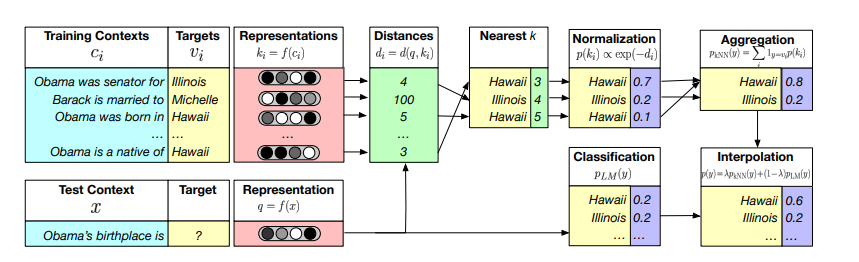 <br>
_Figure 1. Re-balancing distribution of tokens based off of a cached database._

In Figure 1, from what I understand, the authors rebalance the distribution of tokens at time step $t$ with an induced distribution $P_{phrase}$. I would think this not only betters the repetition problem (in certain contexts) but also lends itself to more human-like/understandable text. 

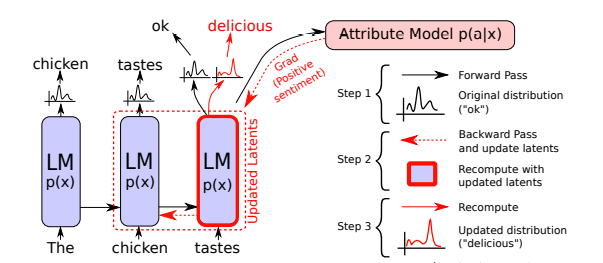 <br>
_Figure 2. Backpropagation-based distribution re-balancing._

In Figure 2, the authors there introduced an _attribute model_ which will enforce certain characteristics in how your NLG model will learn. It can enforce behavior like sentiment. 

Instead of re-balancing a distribution, we can also change the ranking of tokens with a __ranking algorithm__. We can define a score to approximate the quality of sequences and re-rank tokens by this score.

# 4. Training NLG Models

NLG models are trained with __teacher forcing__. That is, when the text generator (transformer decoder in the transformer case) learns to generate text, it will accept its own previously generated tokens as a sequence. Instead, it will be given the ground truth tokens. This helps it learn faster.

Training with teacher forcing leads to __exposure bias__ because during inference time, the model won't have access to these gold standard context tokens. 

We train NLG models by maximizing the likelihood of the next word, but humans don't talk like this! Training via maximizing likelihood leads to repetitive text. Some work has introduced another loss term deemed the __unlikelihood__ loss. Which will force the model to lower the likelihood of previously-seen tokens. This limits repetition and increases diversity!

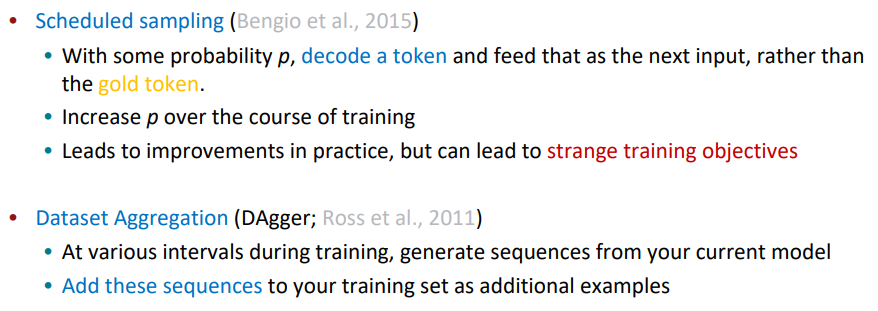 <br>
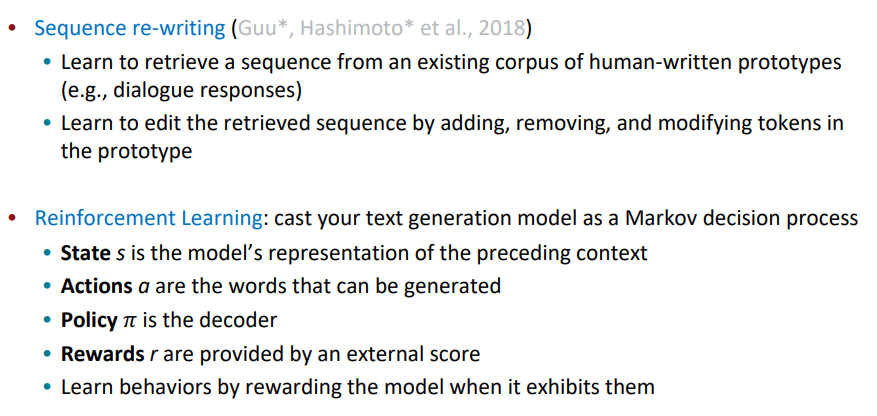 <br>
_Figure 3. Some exposure bias solutions._

# 5. Evaluating NLG Systems

There are 3 types of evaluation metrics:
* __content overlap metrics__
* __model-based metrics__
* __human evaluation__

BLEU is an example of a content overlap metric. These types of metrics are not ideal for machine translation (language may have many synonyms, not a single way to generate something correct). There are also __semantic overlap metrics__ which evaluate semantics or meaning rather than just matching tokens. Some popular semantic overlap metrics include PYRAMID, SPICE, and SPIDER.

Model-based metrics use learned representations of words and sentences to compute a semantic similarity between generated and reference text. Some popular model-based metrics include vector similarity, Word Mover's distance, BERTSCORE, Sentence Movers Similarity, and BLEURT.

Human evaluation is expensive, but this type of evaluation can be more tailored towards a task (and be more accurate). Humans also are prone to errors.

# 6. Ethical Considerations

Microsoft's twitter chatbot AI tay.ai went from "humans are super cool" to harmful and negative statements in just a day. Language models learn biases in our culture from the text it is trained on.

These models need safeguards and need to be carefully managed and considered before deployment.

# 7. Resource

If you missed the link right below the title, I'm providing the resource here again along with the course website.

- [Stanford CS224N](https://www.youtube.com/watch?v=rmVRLeJRkl4)
- [Course Website](http://web.stanford.edu/class/cs224n/)

This is a series of 23 lectures provided by Stanford.
